In [1]:
import napari
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path

from cryofib.n5_utils import read_volume, print_key_tree
from cryofib.napari_utils import napari_add_group
from cryofib.data_loaders import load_F107_A1_pred, load_F107_A1_multicut, load_F107_A1_corrected

## View n5 datasets

In [2]:
data_dir = Path("/g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107")
em_n5_path = data_dir / "F107_A1_em.n5"

f_em = z5py.File(em_n5_path, "r")

In [3]:
print_key_tree(f_em)

Key structure of z5 file /g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em.n5
raw
segmentation
segmentation/nuclei
segmentation/edoardo
segmentation/edoardo/boundaries
segmentation/edoardo/foreground
segmentation/ground_truth_channels
segmentation/ground_truth
raw_norm


## Read volumes

In [4]:
roi = np.s_[:]
em = read_volume(f_em, "raw", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume raw from /g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em.n5
Read volume with shape (1350, 1506, 1647), data type uint8


## Open raw in napari

In [5]:
v = napari.Viewer()

In [6]:
ds = f_em["raw"]
v.add_image(em, name="raw")

<Image layer 'raw' at 0x7efc6c7ce440>

In [18]:
gt = read_volume(f_em, "segmentation/ground_truth", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume segmentation/ground_truth from /g/kreshuk/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em.n5
Read volume with shape (1350, 1506, 1647), data type int64


In [19]:
v.add_labels(gt, name="gt")

<Labels layer 'gt' at 0x7f2240692e90>

## Multicut

In [7]:
f_corr = load_F107_A1_corrected()

In [8]:
print_key_tree(f_corr)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut_corrected.n5
segmentation_corrected
segmentation_final
segmentation
segmentation/segmentation_corrected_postprocessed
segmentation/segmentation_corrected_watershed


In [9]:
roi = np.s_[:]
postprocessed = read_volume(f_corr, "segmentation_final", roi)


<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume segmentation_final from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut_corrected.n5
Read volume with shape (1350, 1506, 1647), data type uint32


In [10]:
v.add_labels(postprocessed , name="multicut_postprocessed ")

<Labels layer 'multicut_postprocessed ' at 0x7f2268488160>

In [9]:
roi = np.s_[:]
ws = read_volume(f_corr, "segmentation/segmentation_corrected_watershed", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume segmentation/segmentation_corrected_watershed from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut_corrected.n5
Read volume with shape (1350, 1506, 1647), data type uint32


In [11]:
v.add_labels(ws, name="multicut_postprocessed_ws")

<Labels layer 'multicut_postprocessed_ws' at 0x7f2254337610>

In [17]:
f_multi = load_F107_A1_multicut()

In [18]:
print_key_tree(f_multi)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut.n5
segmentation
segmentation/multicut_0.6_postprocessed_10000
segmentation/multicut_0.6_postprocessed
3D_s0_quantile_norm
3D_s0_quantile_norm/ws
3D_s0_quantile_norm/multicut_0.5
3D_s0_quantile_norm/multicut_0.6
3D_s0_quantile_norm/multicut_0.4
2D_s0_quantile_norm_averaged
2D_s0_quantile_norm_averaged/multicut_0.3
2D_s0_quantile_norm_averaged/multicut_extra_0.3
2D_s0_quantile_norm_averaged/multicut_0.7
2D_s0_quantile_norm_averaged/multicut_0.5
2D_s0_quantile_norm_averaged/multicut_extra_0.7
2D_s0_quantile_norm_averaged/multicut_0.4
2D_s0_quantile_norm_averaged/multicut_extra_0.4
2D_s0_quantile_norm_averaged/multicut_extra_0.5
2D_s0_quantile_norm_averaged/multicut_0.6
2D_s0_quantile_norm_averaged/multicut_extra_0.6
2D_s0_quantile_norm_averaged/ws
2D_s0_quantile_norm
2D_s0_quantile_norm/multicut_0.4
2D_s0_quantile_norm/ws
2D_s0_quantile_norm/multicut_0.5
2D_s0_quantile_norm/multicut_0.6


In [19]:
roi = np.s_[:]
multicut = read_volume(f_multi, "2D_s0_quantile_norm_averaged/multicut_extra_0.6", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume 2D_s0_quantile_norm_averaged/multicut_extra_0.6 from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut.n5
Read volume with shape (1350, 1506, 1647), data type uint64


In [20]:
v.add_labels(multicut, name="multicut_06")

<Labels layer 'multicut_06' at 0x7f226832d7b0>

In [10]:
roi = np.s_[:]
multicut = read_volume(f_multi, "segmentation/multicut_0.6_postprocessed", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume segmentation/multicut_0.6_postprocessed from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut.n5
Read volume with shape (1350, 1506, 1647), data type uint32


In [11]:
v.add_labels(multicut, name="multicut_06_postprocessed")

<Labels layer 'multicut_06_postprocessed' at 0x7f4104734370>

In [12]:
roi = np.s_[:]
multicut = read_volume(f_multi, "segmentation/multicut_0.6_postprocessed_10000", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume segmentation/multicut_0.6_postprocessed_10000 from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_multicut.n5
Read volume with shape (1350, 1506, 1647), data type uint32


In [13]:
v.add_labels(multicut, name="multicut_06_postprocessed_10000")

<Labels layer 'multicut_06_postprocessed_10000' at 0x7f4104616200>

### Open all predictions in a group

In [7]:
f_pred = load_F107_A1_pred()

In [8]:
print_key_tree(f_pred)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
predictions
predictions/2D_s0_quantile_norm_min
predictions/2D_s0_quantile_norm_min/boundaries
predictions/2D_s0_quantile_norm_min/extra
predictions/2D_s0_quantile_norm_mean
predictions/2D_s0_quantile_norm_mean/boundaries
predictions/2D_s0_quantile_norm_mean/extra
predictions/full_masked_dice_s0_64x256x256_128x128x128
predictions/full_masked_dice_s0_64x256x256_128x128x128/fg
predictions/full_masked_dice_s0_64x256x256_128x128x128/extra
predictions/full_masked_dice_s0_64x256x256_128x128x128/bg
predictions/full_masked_dice_s0_64x256x256_128x128x128/boundaries
predictions/full_masked_dice_s0_64x256x256
predictions/full_masked_dice_s0_64x256x256/boundaries
predictions/full_masked_dice_s0_64x256x256/fg
predictions/full_masked_dice_s0_64x256x256/extra
predictions/full_masked_dice_s0_64x256x256/bg
predictions/2D_s0_quantile_norm_yzx
predictions/2D_s0_quantile_norm_yzx/fg
predictions/2D_s0_quantile_no

In [13]:
roi = np.s_[:]
boundaries = read_volume(f_pred, "predictions/2D_s0_quantile_norm_mean/boundaries", roi)
boundaries = boundaries > 0.7

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/2D_s0_quantile_norm_mean/boundaries from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float64


In [14]:
v.add_image(boundaries, name="boundaries")

<Image layer 'boundaries [2]' at 0x7efc6c335210>

In [24]:
v.add_labels(boundaries, name="boundaries_3D")

<Labels layer 'boundaries_3D' at 0x7f2258049e40>

In [9]:
roi = np.s_[:]
extra = read_volume(f_pred, "predictions/2D_s0_quantile_norm_mean/extra", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/2D_s0_quantile_norm_mean/extra from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float64


In [10]:
v.add_image(extra, name="extra")

<Image layer 'extra' at 0x7fcdf0259960>

In [13]:
extra_1 = (extra > 0.3).astype(np.int16)

In [15]:
extra_middle = ((extra > 0.4) & (extra <= 0.5))

In [14]:
v.add_labels(extra_1)

<Labels layer 'extra_1 [1]' at 0x7fcde80b25f0>

In [16]:
v.add_labels(extra_middle)

<Labels layer 'extra_middle' at 0x7fac042dc220>

In [15]:
from skimage.measure import label

In [ ]:
extra_segm = label(extra_1)

In [ ]:
component_sizes = []

In [11]:
roi = np.s_[:]
extra_xzy = read_volume(f_pred, "predictions/2D_s0_quantile_norm_xzy/extra", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/2D_s0_quantile_norm_xzy/extra from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float64


In [12]:
v.add_image(extra_xzy, name="extra_xzy")

<Image layer 'extra_xzy' at 0x7fc72c0748e0>

In [ ]:
extra_min = np.minimum(extra, extra_xyz)

(array([1.61656400e+06, 1.46465300e+06, 1.35923000e+06, 1.25479100e+06,
        1.15940100e+06, 1.06096300e+06, 9.77814000e+05, 9.00404000e+05,
        8.39098000e+05, 7.82722000e+05, 7.22721000e+05, 6.71288000e+05,
        6.33055000e+05, 5.96999000e+05, 5.59364000e+05, 5.28000000e+05,
        5.03691000e+05, 4.86783000e+05, 4.70087000e+05, 4.52412000e+05,
        4.40282000e+05, 4.25888000e+05, 4.16038000e+05, 4.03902000e+05,
        3.94384000e+05, 3.89219000e+05, 3.79107000e+05, 3.73549000e+05,
        3.65889000e+05, 3.62466000e+05, 3.60626000e+05, 3.51284000e+05,
        3.44411000e+05, 1.57703132e+08, 3.28165000e+05, 3.25301000e+05,
        3.20715000e+05, 3.17838000e+05, 3.13886000e+05, 3.09489000e+05,
        3.07232000e+05, 3.05650000e+05, 3.02489000e+05, 3.01843000e+05,
        3.01431000e+05, 2.98619000e+05, 2.97537000e+05, 2.97652000e+05,
        2.95828000e+05, 2.94617000e+05, 2.95111000e+05, 2.97996000e+05,
        2.94153000e+05, 2.92270000e+05, 2.91399000e+05, 2.942240

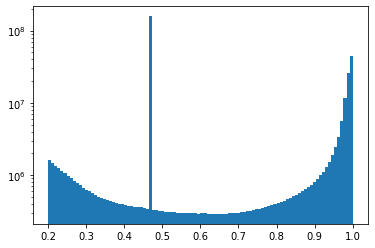

In [10]:
plt.hist(extra[extra > 0.2].flatten(), bins=100, log=True)

In [12]:
v.add_image(extra, name="extra")

<Image layer 'extra' at 0x7fec00304490>

In [10]:
bg = read_volume(f_pred, "predictions/2D_s0/bg", roi)
v.add_image(bg, name="bg")

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/2D_s0/bg from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float64


<Image layer 'bg' at 0x7f1de03a2c80>

In [14]:
fg = read_volume(f_pred, "predictions/full_masked_dice_s0_64x256x256/fg", roi)
v.add_image(fg, name="fg")

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume predictions/full_masked_dice_s0_64x256x256/fg from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_em_3Dunet.n5
Read volume with shape (1350, 1506, 1647), data type float32


<Image layer 'fg' at 0x7fe6b0124250>